<a href="https://colab.research.google.com/github/Lou1108/DeepLearning/blob/main/laser_prediction_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, GRU, LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## Data Loading

In [76]:
data_train = loadmat('/content/drive/MyDrive/Deep Learning/Xtrain.mat')['Xtrain']
data_test = loadmat('/content/drive/MyDrive/Deep Learning/Xtest.mat')['Xtest']
#As requested in point a) we scale the data, preparing it for the neural network.
scaler = MinMaxScaler(feature_range=(0, 1))
data_train_scaled = scaler.fit_transform(data_train)
y_test = scaler.transform(data_test)

Converting time series into supervised learning format. It uses a sliding window (time_step) for one-step-ahead prediction

In [7]:
def create_dataset(data, time_step): #supervised format
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [13]:
X, y = create_dataset(data_train_scaled, 120)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Model Training
Training 3 different models (RNN, LSTM, and GRU) on the given test data to compare the errors.

Trying different time steps, as requested in point b) to tune for each of the different models the best performance and of all models the best one.

In [101]:
time_steps=list(range(1, 151, 25))
results_RNN = []
print("Training the RNN")
for ts in time_steps:
    X, y = create_dataset(data_train_scaled, ts)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model_rnn = Sequential()
    model_rnn.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model_rnn.add(SimpleRNN(units=100))
    model_rnn.add(Dense(units=1))
    early_stop = EarlyStopping(monitor='loss', patience=5)
    model_rnn.compile(optimizer='adam', loss='mean_squared_error')

    model_rnn.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[early_stop])

    predictions = model_rnn.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    mse = mean_squared_error(y_test_scaled, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_scaled, predictions)
    results_RNN.append([ts, mse, rmse, mae])

results_LSTM=[]
print("Training the LSTM")
for ts in time_steps:
    X, y = create_dataset(data_train_scaled, ts)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model_lstm.add(LSTM(units=50))
    model_lstm.add(Dense(units=1))

    early_stop = EarlyStopping(monitor='loss', patience=5)
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')
    model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[early_stop])

    predictions = model_lstm.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    mse = mean_squared_error(y_test_scaled, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_scaled, predictions)
    results_LSTM.append([ts, mse, rmse, mae])

results_GRU = []
print("Training the GRU")
for ts in time_steps:
  X, y = create_dataset(data_train_scaled, ts)
  X = X.reshape(X.shape[0], X.shape[1], 1) #3D reshaping

  train_size = int(len(X) * 0.8)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]

  model_GRU = Sequential()
  model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
  model_GRU.add(GRU(units=50))
  model_GRU.add(Dense(units=1))
  model_GRU.compile(optimizer='adam', loss='mean_squared_error')
  early_stop = EarlyStopping(monitor='loss', patience=5)
  model_GRU.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[early_stop])

  predictions = model_GRU.predict(X_test)
  predictions = scaler.inverse_transform(predictions)
  y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

  mse = mean_squared_error(y_test_scaled, predictions)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test_scaled, predictions)
  results_GRU.append([ts, mse, rmse, mae])


Training the RNN
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0695
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0256
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0271
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0242
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0317
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0227
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0248
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0258
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0242
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0273
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0256
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0261
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0264
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0246
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2182
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0200
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0077
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0078
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0060
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0056
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0067
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0045
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0066
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0060
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0056
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0055
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0080
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0063
Epoch 16/50
25/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1301
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0104
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0092
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0080
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0064
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0100
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0098
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0100
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0083
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0064
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0060
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0061
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0063
Epoch 16/50
24/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0782
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0158
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0134
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0227
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0137
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0135
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0118
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0104
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0148
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0103
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0124
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0238
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1054
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0271
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0302
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0138
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0096
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0120
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0099
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0106
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0106
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0092
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0067
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0096
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0079
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0073
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0060
Epoch 16/50
23/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0877
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0180
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0092
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0112
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0129
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0093
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0072
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0078
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0085
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0068
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0066
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0091
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0080
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0072
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0048
Epoch 16/50
22/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0811
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0400
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0314
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0288
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0332
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0277
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0258
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0251
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0268
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0277
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0253
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0258
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0245
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0234
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0272
Epoch 16/50
25/25 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0610
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0363
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0379
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0354
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0375
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0311
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0265
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0189
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0123
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0145
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0152
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0177
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0134
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0139
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0124
Epoch 16/50
25/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0515
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0375
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0341
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0316
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0271
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0203
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0171
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0155
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0153
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0156
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0132
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0140
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0117
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0111
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0118
Epoch 16/50
24/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0543
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0398
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0342
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0336
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0335
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0249
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0211
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0161
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0146
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0135
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0147
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0106
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0123
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0116
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0104
Epoch 16/50
24/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0459
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0348
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0308
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0322
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0312
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0287
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0225
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0190
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0160
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0124
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0138
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0116
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0148
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0105
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0104
Epoch 16/50
23/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 0.0541
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0375
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0355
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0322
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0298
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0278
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0282
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0180
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0181
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0166
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0126
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0099
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0174
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0109
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0134
Epoch 16/50
22/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0536
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0291
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0302
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0254
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0254
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0277
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0277
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0255
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0279
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0229
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0231
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0256
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0291
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0251
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0226
Epoch 16/50
25/25 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0604
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0283
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0236
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0130
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0121
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0119
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0109
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0096
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0108
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0096
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0074
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0050
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0040
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0046
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0042
Epoch 16/50
25/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0510
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0373
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0285
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0187
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0126
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0117
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0109
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0120
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0107
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0088
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0082
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0059
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0054
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0043
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0029
Epoch 16/50
24/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0636
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0366
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0264
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0159
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0133
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0108
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0108
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0092
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0103
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0082
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0052
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0059
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0050
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0033
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0046
Epoch 16/50
24/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.0472
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0387
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0284
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0168
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0127
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0135
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0105
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0121
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0094
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0115
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0082
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0082
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0059
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0046
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0036
Epoch 16/50
23/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0507
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0363
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0291
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0205
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0123
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0117
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0117
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0104
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0105
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0106
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0098
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0078
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0066
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0037
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0048
Epoch 1

### Results of the model training
For finetuning the window size

In [102]:
# display the results of all three models
df_rnn = pd.DataFrame(results_RNN, columns=["time_step", "MSE", "RMSE", "MAE"])
df_lstm = pd.DataFrame(results_LSTM, columns=["time_step", "MSE", "RMSE", "MAE"])
df_gru = pd.DataFrame(results_GRU, columns=["time_step", "MSE", "RMSE", "MAE"])

print("RNN results:\n", df_rnn)
print("\nLSTM results:\n", df_lstm)
print("\nGRU results:\n", df_gru)

RNN results:
    time_step          MSE       RMSE        MAE
0          1  1384.146509  37.204120  30.659159
1         26   234.177815  15.302870  13.155104
2         51    44.605484   6.678734   5.207160
3         76   503.538525  22.439664  18.449233
4        101   232.576252  15.250451  13.154436
5        126   251.435810  15.856728  14.073770

LSTM results:
    time_step          MSE       RMSE        MAE
0          1  1300.144597  36.057518  28.968837
1         26    62.302839   7.893215   6.204203
2         51    18.802821   4.336222   3.369842
3         76    36.676004   6.056072   4.509031
4        101    27.939168   5.285751   3.937545
5        126    26.547892   5.152465   4.236994

GRU results:
    time_step          MSE       RMSE        MAE
0          1  1426.745368  37.772283  33.047793
1         26    27.705770   5.263627   3.895068
2         51    14.339051   3.786694   2.829611
3         76    33.867095   5.819544   4.046862
4        101    41.661374   6.454562   5.45

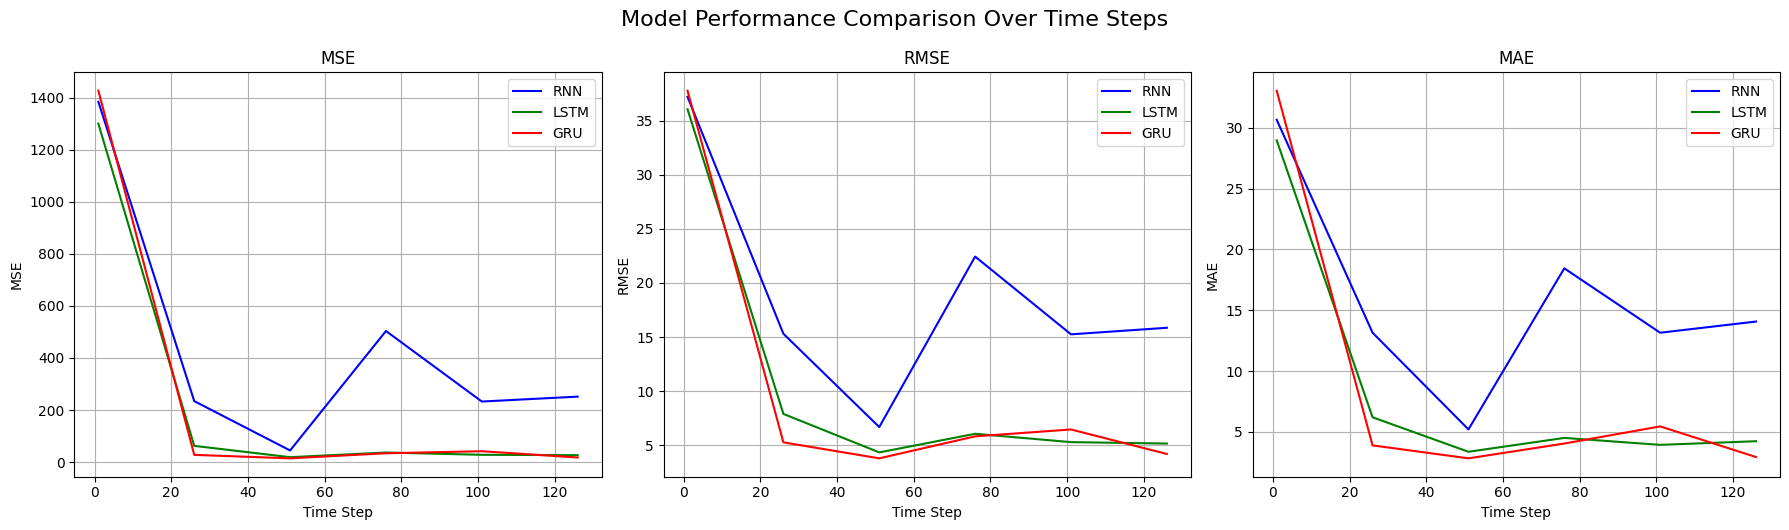

In [103]:
# create mappings for models
models = {"RNN": df_rnn, "LSTM": df_lstm, "GRU": df_gru}
colors = {"RNN": "blue", "LSTM": "green", "GRU": "red"}

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
for idx, metric in enumerate(["MSE", "RMSE", "MAE"]):
    ax = axes[idx]
    for model_name, df in models.items():
        ax.plot(df["time_step"], df[metric], label=model_name, color=colors[model_name])
    ax.set_title(metric)
    ax.set_xlabel("Time Step")
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.suptitle("Model Performance Comparison Over Time Steps", fontsize=16, y=1.05)
plt.savefig("ModelPerformanceComparison.jpg")
plt.show()

### Fine-tuning the window size for GRU

In [ ]:
time_steps=list(range(100, 201, 25))
results_GRU = []
print("GRU")
for ts in time_steps:
  X, y = create_dataset(data_train_scaled, ts)
  X = X.reshape(X.shape[0], X.shape[1], 1) #3D reshaping

  train_size = int(len(X) * 0.8)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]

  model_GRU = Sequential()
  model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
  model_GRU.add(GRU(units=50))
  model_GRU.add(Dense(units=1))
  model_GRU.compile(optimizer='adam', loss='mean_squared_error')
  early_stop = EarlyStopping(monitor='loss', patience=5)
  model_GRU.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

  predictions = model_GRU.predict(X_test)
  predictions = scaler.inverse_transform(predictions)
  y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

  mse = mean_squared_error(y_test_scaled, predictions)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test_scaled, predictions)
  results_GRU.append([ts, mse, rmse, mae])

df_gru = pd.DataFrame(results_GRU, columns=["time_step", "MSE", "RMSE", "MAE"])

print("\nGRU results:\n", df_gru)

GRU
Epoch 1/100


/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0501
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0306
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0272
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0132
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0116
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0115
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0113
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0104
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0112
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0100
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0080
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0071
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0045
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0042
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0042
E

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0545
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0357
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0296
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0202
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0125
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0146
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0124
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0129
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0115
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0098
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0095
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0079
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0048
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0051
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0034


/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0690
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0336
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0317
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0239
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0185
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0134
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0119
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0108
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0106
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0100
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0095
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0072
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0061
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0056
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0051


/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0522
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0297
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0284
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0199
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0116
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0111
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0125
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - loss: 0.0108
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 0.0109
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - loss: 0.0090
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0095
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - loss: 0.0112
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - loss: 0.0095
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.0071
Epoch 15/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - los

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - loss: 0.0472
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0311
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 0.0288
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0215
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - loss: 0.0124
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0113
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0111
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0095
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0102
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0080
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0084
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.0077
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0050
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0062
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step 

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0480
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0352
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0232
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0136
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0127
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0133
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0123
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0118
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0107
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0106
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0095
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0077
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0041
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0054
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0047
E

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0521
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0375
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0272
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0195
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0150
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0120
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0106
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0113
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0116
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0106
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0085
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 239ms/step - loss: 0.0085
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0066
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0047
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0037

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - loss: 0.0488
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0321
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - loss: 0.0256
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 0.0155
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - loss: 0.0151
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - loss: 0.0125
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0108
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0120
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0101
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0110
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.0113
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.0083
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - loss: 0.0075
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.0051
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step -

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 0.0504
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0323
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.0239
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - loss: 0.0139
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0118
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0118
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0100
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.0100
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0099
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0091
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0106
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.0097
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0068
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.0053
Epoch 15/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step -

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - loss: 0.0589
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 0.0290
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0280
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0244
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - loss: 0.0212
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - loss: 0.0098
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.0108
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 0.0089
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.0099
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - loss: 0.0096
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - loss: 0.0085
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 0.0071
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - loss: 0.0069
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.0048
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step 

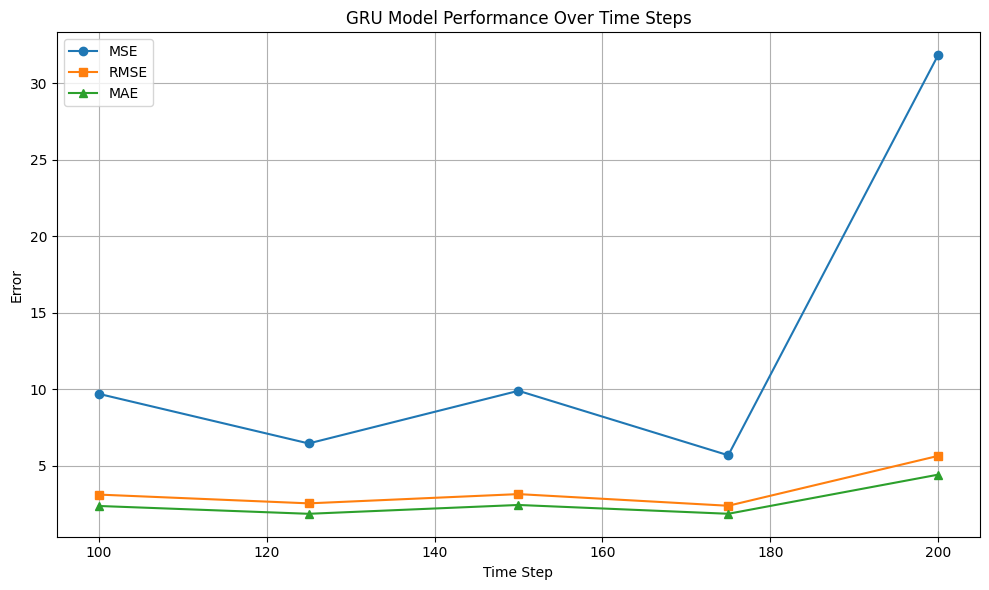

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_gru["time_step"], df_gru["MSE"], marker='o', label='MSE')
plt.plot(df_gru["time_step"], df_gru["RMSE"], marker='s', label='RMSE')
plt.plot(df_gru["time_step"], df_gru["MAE"], marker='^', label='MAE')

plt.title("GRU Model Performance Over Time Steps")
plt.xlabel("Time Step")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("GRUPerformance.jpg")
plt.show()

## Train GRU model on the best hyperparameters

In [117]:
best_ts=50
X_train, y_train = create_dataset(data_train_scaled, best_ts) #with the best fine-tuned time step = 125
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [118]:
# Define and compile the model
model_GRU = Sequential()
model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_GRU.add(GRU(units=50))
model_GRU.add(Dense(units=1))
model_GRU.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
early_stop = EarlyStopping(monitor='loss', patience=5)
model_GRU.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0524
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0321
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0151
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0120
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0104
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0102
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0085
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0084
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0077
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0061
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0034
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0031
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0035
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0034
Epoch 15/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0020
E

<ipython-input-95-ebae833b3b08>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


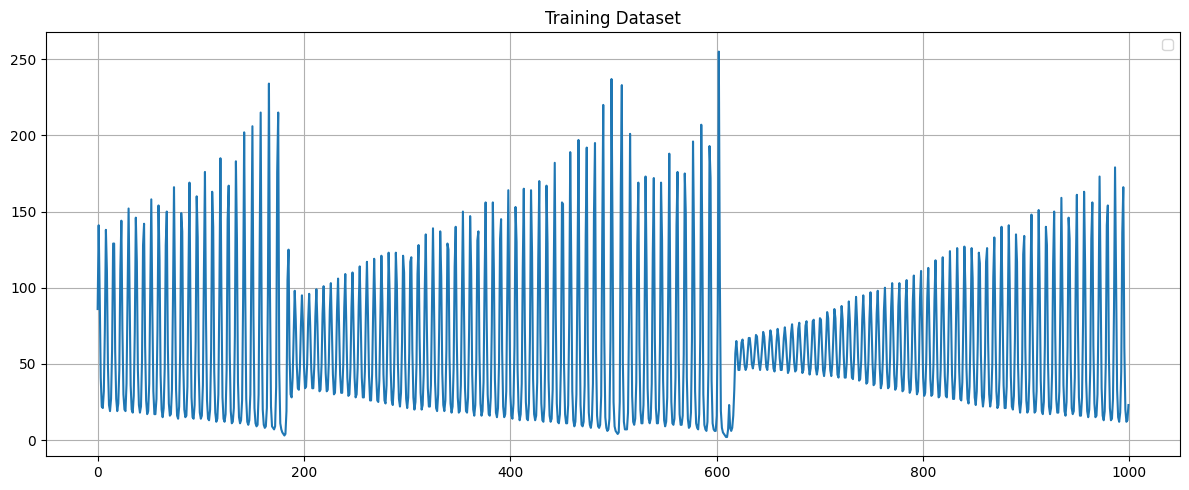

In [95]:
plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(data_train)), data_train)
plt.legend()
plt.title("Training Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()

## Recursive prediction
As stated in assignment c, the best model (GRU) is used to predict 200 steps recursively using the previsouly determined best time-step.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

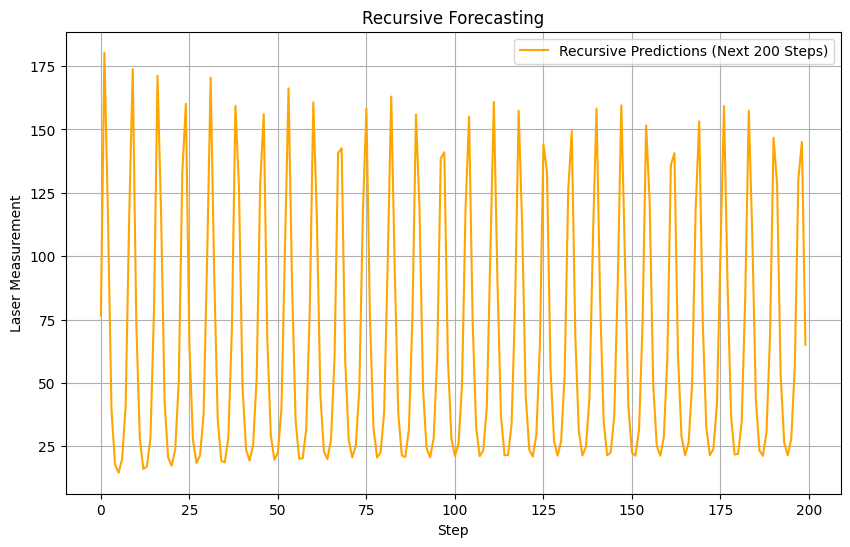

In [119]:
time_step = 50
last_input = y_train[-time_step:].reshape(1, time_step, 1)

# Step 3: Recursive prediction for 200 steps
recursive_preds = []
for _ in range(200):
    next_pred = model_GRU.predict(last_input)[0, 0]
    recursive_preds.append(next_pred)
    last_input = np.append(last_input[:, 1:, :], [[[next_pred]]], axis=1)

recursive_preds_scaled = scaler.inverse_transform(np.array(recursive_preds).reshape(-1, 1))

plt.figure(figsize=(10,6))
plt.plot(recursive_preds_scaled, label='Recursive Predictions (Next 200 Steps)', color='orange')
plt.title('Recursive Forecasting')
plt.xlabel('Step')
plt.ylabel('Laser Measurement')
plt.legend()
plt.grid(True)
plt.show()

plot to show the last 150 known values from the test set (in blue) followed by the 200 recursively predicted future steps (in orange).

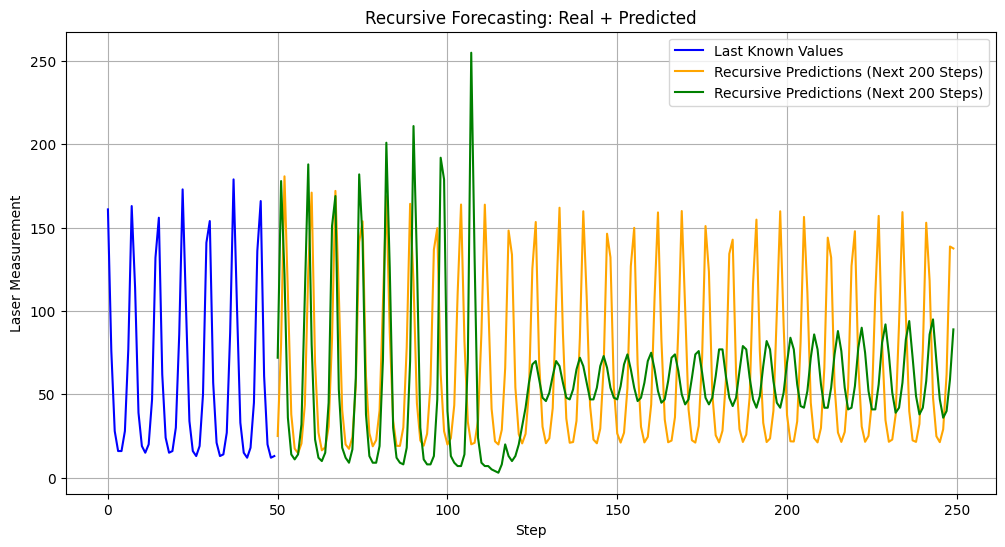

In [121]:
true_window = scaler.inverse_transform(X_train[-1].reshape(-1, 1))
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(true_window)), true_window, label="Last Known Values", color='blue')
plt.plot(np.arange(len(true_window), len(true_window) + len(recursive_preds_scaled)),
         recursive_preds_scaled, label="Recursive Predictions (Next 200 Steps)", color='orange')
plt.plot(np.arange(len(true_window), len(true_window) + len(recursive_preds_scaled)),
         data_test, label="Recursive Predictions (Next 200 Steps)", color='green')
plt.xlabel("Step")
plt.ylabel("Laser Measurement")
plt.title("Recursive Forecasting: Real + Predicted")
plt.legend()
plt.grid(True)
plt.savefig("RecursiveForecastingRealANDPredicted.jpg")
plt.show()

In [123]:
mae = np.mean(np.abs(recursive_preds_scaled - data_test))
mse = np.mean((recursive_preds_scaled - data_test) ** 2)
print("MAE:", mae)
print("MSE:", mse)

MAE: 49.703663
MSE: 4157.447


GRU with harmonic time encoding

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0771
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0451
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0391
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0400
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0410
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0347
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0333
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0291
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0290
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0260
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0250
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0233
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0191
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0141
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0161
Epoch 16/50
30/

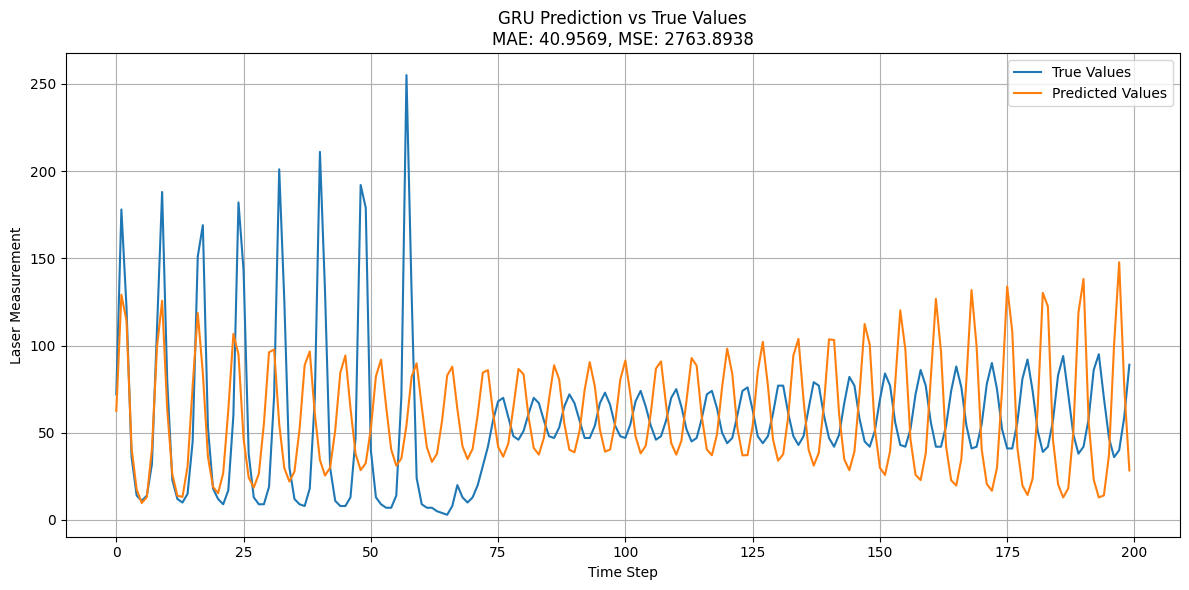

In [112]:
train_scaled = scaler.fit_transform(data_train.reshape(-1, 1)).flatten()
window_size = 50
period = 400

# Create input sequences
def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        t = np.arange(i, i + window)
        sin_t = np.sin(2 * np.pi * t / period)
        cos_t = np.cos(2 * np.pi * t / period)
        sin2_t = np.sin(4 * np.pi * t / period)
        cos2_t = np.cos(4 * np.pi * t / period)
        seq = np.vstack((data[i:i+window], sin_t, cos_t, sin2_t, cos2_t)).T
        X.append(seq)
        y.append(data[i + window])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, window_size)

model = Sequential([
    GRU(64, return_sequences=True, input_shape=(window_size, 5)),
    Dropout(0.2),
    GRU(32),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

input_seq = train_scaled[-window_size:].copy()
predictions = []

for i in range(200):
    t = np.arange(len(train_scaled) + i - window_size, len(train_scaled) + i)
    sin_t = np.sin(2 * np.pi * t / period)
    cos_t = np.cos(2 * np.pi * t / period)
    sin2_t = np.sin(4 * np.pi * t / period)
    cos2_t = np.cos(4 * np.pi * t / period)
    input_features = np.vstack((input_seq, sin_t, cos_t, sin2_t, cos2_t)).T.reshape(1, window_size, 5)
    pred = model.predict(input_features, verbose=0)[0, 0]
    predictions.append(pred)
    input_seq = np.append(input_seq, pred)[-window_size:]

print("Sample raw predictions:", predictions[:5])

# Clip predictions to [0, 1] to avoid inverse scaling distortions
pred_clipped = np.clip(predictions, 0, 1)
predicted_values = scaler.inverse_transform(np.array(pred_clipped).reshape(-1, 1)).flatten()

# Use original test values directly (already in real scale)
true_values = data_test.flatten()

# Evaluation
mae = np.mean(np.abs(predicted_values - true_values))
mse = np.mean((predicted_values - true_values) ** 2)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(true_values, label='True Values')
plt.plot(predicted_values, label='Predicted Values')
plt.title(f'GRU Prediction vs True Values\nMAE: {mae:.4f}, MSE: {mse:.4f}')
plt.xlabel('Time Step')
plt.ylabel('Laser Measurement')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
